In [118]:
import pandas as pd 
import matplotlib.pyplot as plt  

In [117]:
%pip install seaborn

In [119]:
import seaborn as sns

In [81]:
df = pd.read_csv('salary_data_cleaned.csv')

In [82]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Average Salary,Company,State,Company Age,Same_State,Python,R Studio,Spark,AWS,Excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,53,0,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,42,0,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,16,1,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,61,1,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,28,1,1,0,0,0,1


In [83]:
## Simplify the job titles into different categories
def title_simplifier(title): 
    if 'data scientist' in title.lower(): 
        return 'Data Scientist'
    elif 'data engineer' in title.lower(): 
        return 'Data Engineer'
    elif 'analyst' in title.lower(): 
        return 'Analyst'
    elif 'machine learning' in title.lower(): 
        return 'Machine Learning Engineer'
    elif 'manager' in title.lower(): 
        return 'Manager'
    elif 'director' in title.lower(): 
        return 'Director' 
    else: 
        return 'NA' 

## Categorize based on seniority
def seniority(title): 
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'sr.' in title.lower():
        return 'Senior' 
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower(): 
        return 'Junior' 
    else: 
        return 'NA'
    

In [84]:
## Make a Job Simplified column in the DataFrame 
df['Job Simplified'] = df['Job Title'].apply(title_simplifier)
df['Job Simplified'].value_counts()

Job Simplified
Data Scientist               279
NA                           184
Data Engineer                119
Analyst                      102
Manager                       22
Machine Learning Engineer     22
Director                      14
Name: count, dtype: int64

In [85]:
## Make a Seniority column in the DataFrame 
df['Seniority'] = df['Job Title'].apply(seniority)
df['Seniority'].value_counts()

Seniority
NA        519
Senior    220
Junior      3
Name: count, dtype: int64

In [86]:
## Adding Los Angeles value to CA
df.State = df['State'].apply(lambda x: x if x.lower() != 'los angeles' else 'CA')
df.State.value_counts()

State
CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: count, dtype: int64

In [87]:
## Job Description Length 
df['Description Length'] = df['Job Description'].apply(lambda x: len(x))
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Company Age,Same_State,Python,R Studio,Spark,AWS,Excel,Job Simplified,Seniority,Description Length
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,53,0,1,0,0,0,1,Data Scientist,NA,2536
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,42,0,1,0,0,0,0,Data Scientist,NA,4783
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,16,1,1,0,1,0,1,Data Scientist,NA,3461
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,61,1,1,0,0,0,0,Data Scientist,NA,3883
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,28,1,1,0,0,0,1,Data Scientist,NA,2728


In [88]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'Minimum Salary', 'Maximum Salary',
       'Average Salary', 'Company', 'State', 'Company Age', 'Same_State',
       'Python', 'R Studio', 'Spark', 'AWS', 'Excel', 'Job Simplified',
       'Seniority', 'Description Length'],
      dtype='object')

In [89]:
## Competitor Count 
df['Competitor Count'] = df.Competitors.apply(lambda x: len(x.split(',')) if x!= '-1' else 0)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Same_State,Python,R Studio,Spark,AWS,Excel,Job Simplified,Seniority,Description Length,Competitor Count
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,1,0,0,0,1,Data Scientist,NA,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,1,0,0,0,0,Data Scientist,NA,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,1,0,1,0,1,Data Scientist,NA,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,1,0,0,0,0,Data Scientist,NA,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,1,0,0,0,1,Data Scientist,NA,2728,3


In [93]:
## Hourly Wage into Yearly Wage (multiply by 2000)
## Minimum Salary
df['Minimum Salary'] = df.apply(lambda row: 2*row['Minimum Salary'] if row.Hourly == 1 else row['Minimum Salary'], axis = 1)
## Maximum Salary 
df['Maximum Salary'] = df.apply(lambda row: 2*row['Maximum Salary'] if row.Hourly == 1 else row['Maximum Salary'], axis = 1)

,Minimum Salary,Maximum Salary
165,34,24
177,42,34
197,36,25
202,42,34
210,30,25
246,34,24
271,42,34
337,36,25
345,48,39
357,42,34


In [95]:
df[df['Hourly'] == 1][['Minimum Salary', 'Maximum Salary']]

,Minimum Salary,Maximum Salary
165,34,48
177,42,68
197,36,50
202,42,68
210,30,50
246,34,48
271,42,68
337,36,50
345,48,78
357,42,68


In [99]:
## Fix the new line character in the Company Name text
df.Company = df.Company.apply(lambda x: x.replace('\n', ''))
df.Company

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company, Length: 742, dtype: object

In [100]:
df.describe()

,Rating,Founded,Hourly,Employer Provided,Minimum Salary,Maximum Salary,Average Salary,Company Age,Same_State,Python,R Studio,Spark,AWS,Excel,Description Length,Competitor Count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,52.187332,0.557951,0.528302,0.001348,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,54.156829,0.496965,0.499535,0.036711,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,282.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<Axes: >

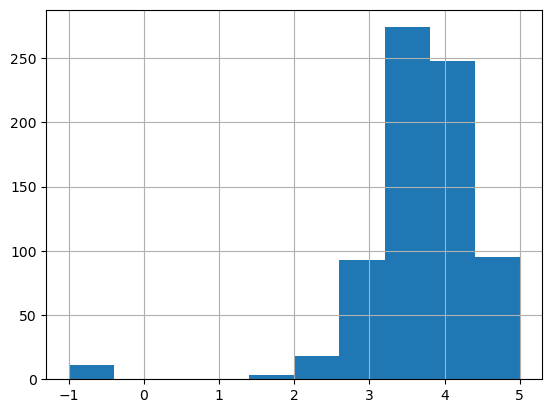

In [102]:
## Histogram for the ratings of the company
df.Rating.hist()

<Axes: >

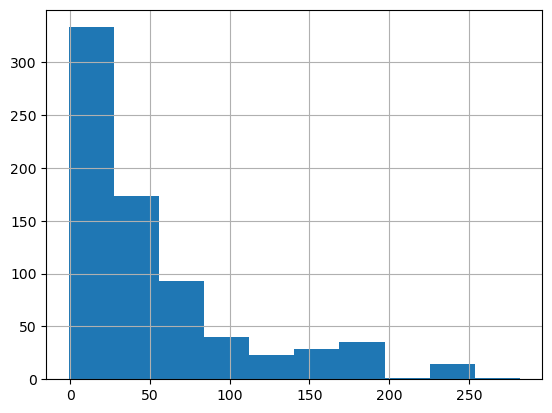

In [105]:
## Histogram for the age of the company
df['Company Age'].hist()

<Axes: >

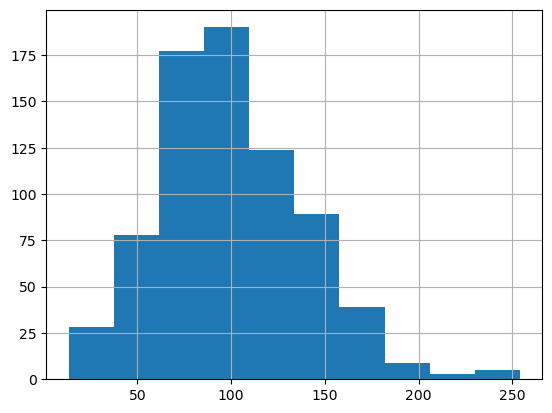

In [106]:
## Histogram for the avg salary 
df['Average Salary'].hist()

<Axes: >

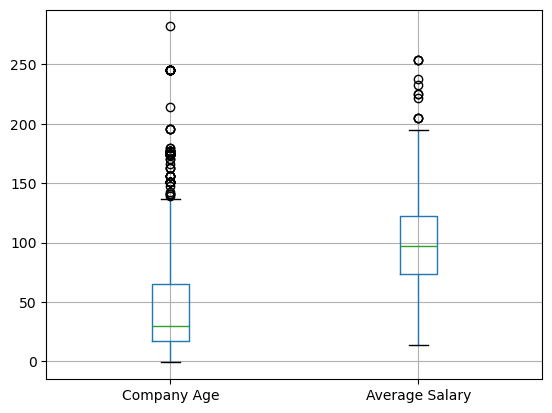

In [111]:
## Boxplot of Company Age and Average Salary 
df.boxplot(column = ['Company Age', 'Average Salary'])

<Axes: >

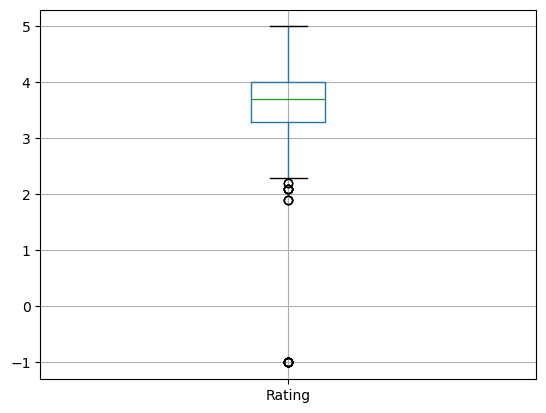

In [112]:
## Boxplot for Rating
df.boxplot(column = ['Rating'])

In [114]:
## Correlations 
df[['Company Age', 'Average Salary', 'Rating', 'Description Length']].corr()

,Company Age,Average Salary,Rating,Description Length
Company Age,1.000000,0.019163,0.030637,0.165514
Average Salary,0.019163,1.000000,0.013492,0.078808
Rating,0.030637,0.013492,1.000000,-0.012281
Description Length,0.165514,0.078808,-0.012281,1.000000


<Axes: >

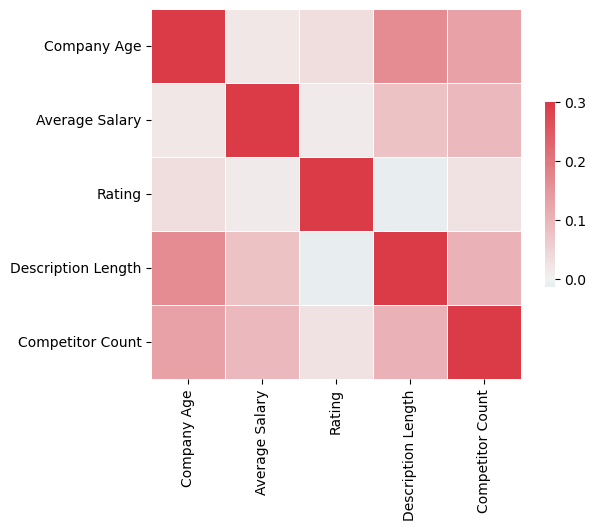

In [123]:
## Correlation heatmap of the continuous variables 
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df[['Company Age', 'Average Salary', 'Rating', 'Description Length', 'Competitor Count']].corr(), vmax = .3, center = 0, square = True, cmap = cmap, linewidths = .5, cbar_kws={"shrink": .5})

In [124]:

df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'Minimum Salary', 'Maximum Salary',
       'Average Salary', 'Company', 'State', 'Company Age', 'Same_State',
       'Python', 'R Studio', 'Spark', 'AWS', 'Excel', 'Job Simplified',
       'Seniority', 'Description Length', 'Competitor Count'],
      dtype='object')

In [127]:
## Categorical columns 
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company', 'State', 'Spark', 'AWS', 'Excel', 'Job Simplified',
       'Seniority']]

Graph for Location: Total = 200


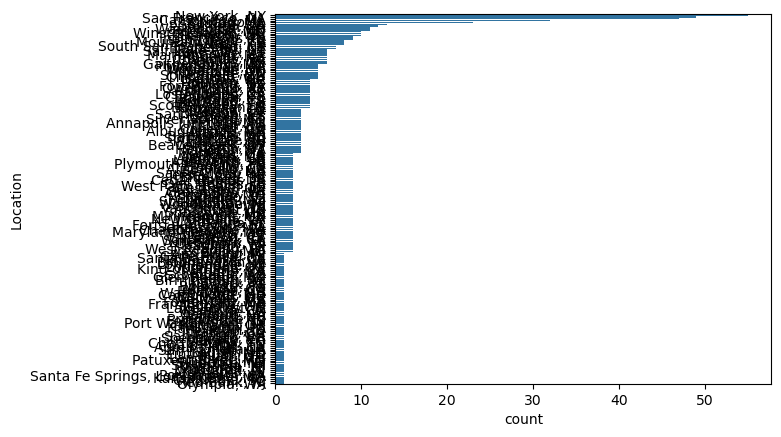

Graph for Headquarters: Total = 198


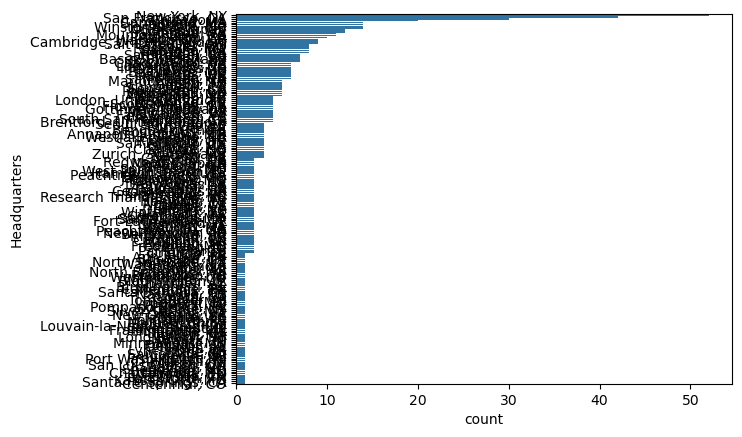

Graph for Size: Total = 9


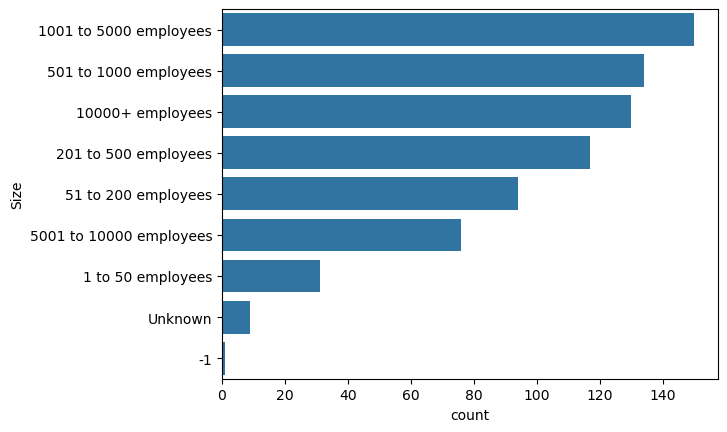

Graph for Type of ownership: Total = 11


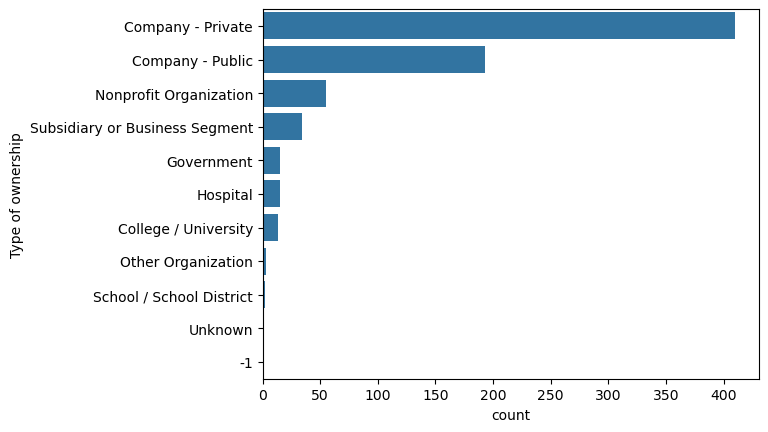

Graph for Industry: Total = 60


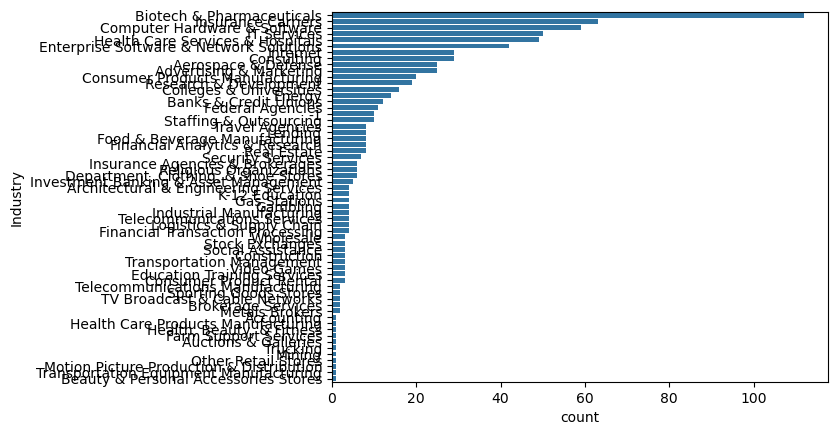

Graph for Sector: Total = 25


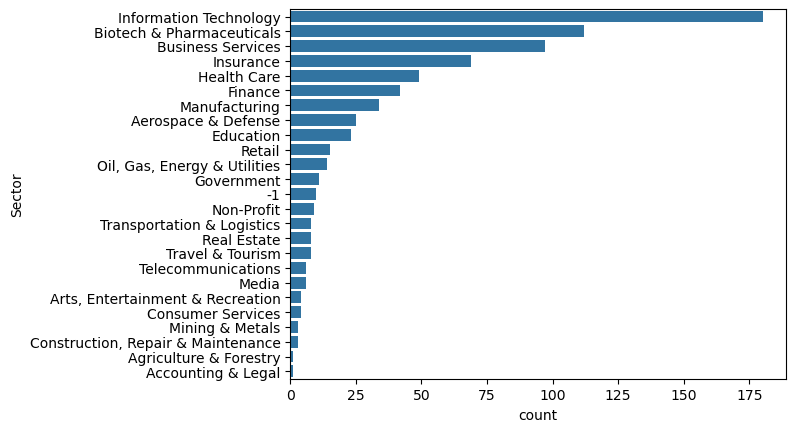

Graph for Revenue: Total = 14


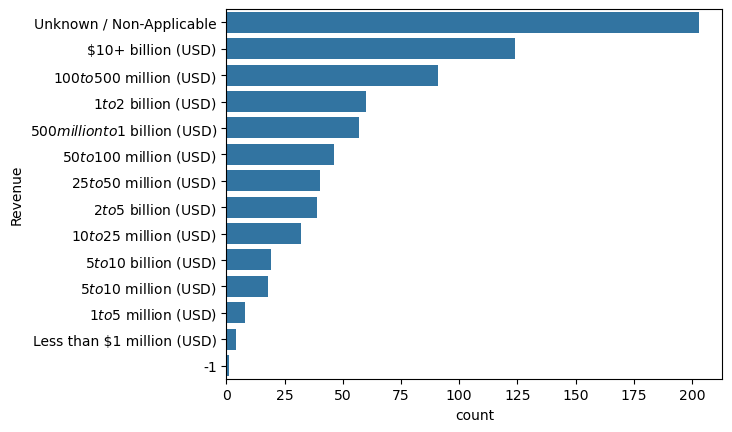

Graph for Company: Total = 343


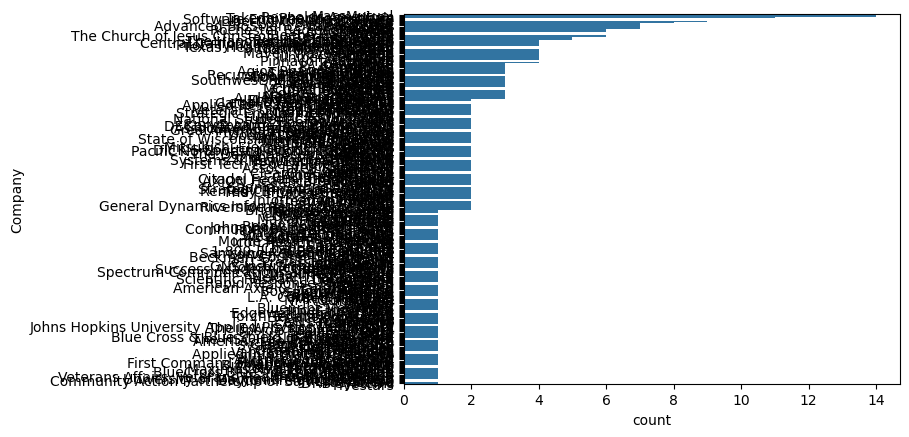

Graph for State: Total = 37


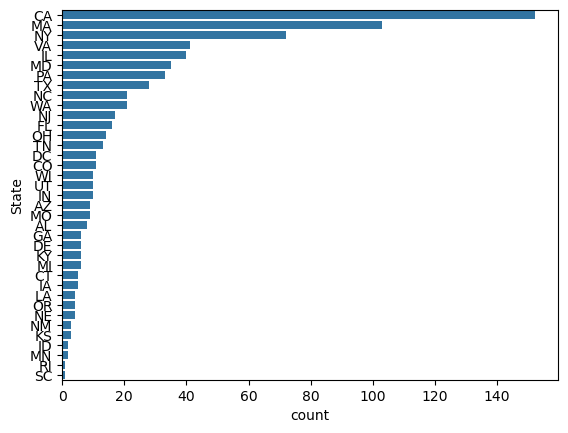

Graph for Spark: Total = 2


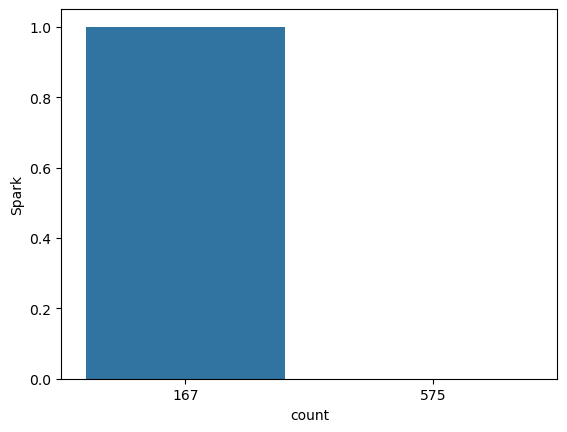

Graph for AWS: Total = 2


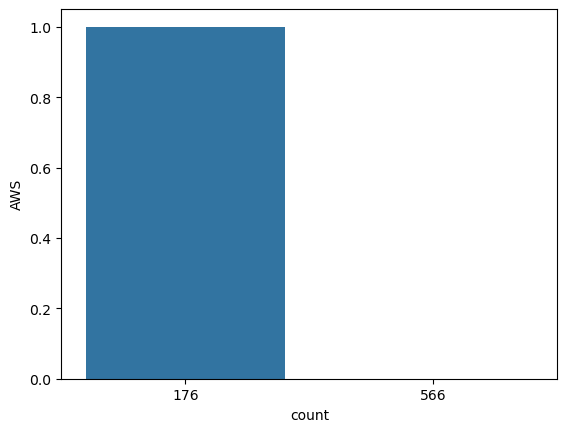

Graph for Excel: Total = 2


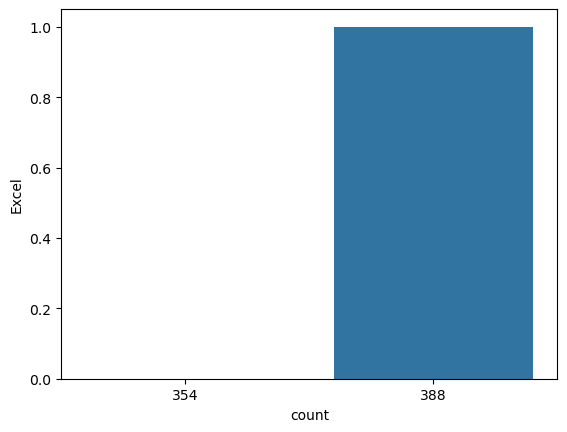

Graph for Job Simplified: Total = 7


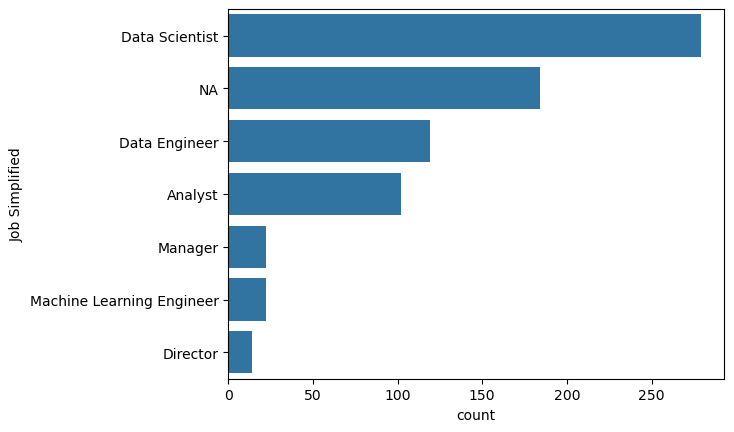

Graph for Seniority: Total = 3


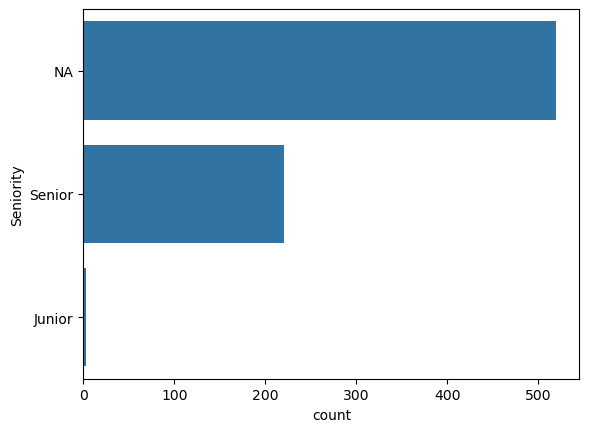

In [137]:
for i in df_cat.columns: 
    cat = df_cat[i].value_counts()
    print("Graph for %s: Total = %d" % (i, len(cat)))
    chart = sns.barplot(x= cat, y = cat.index)
    plt.show()

Graph for Location: Total = 20


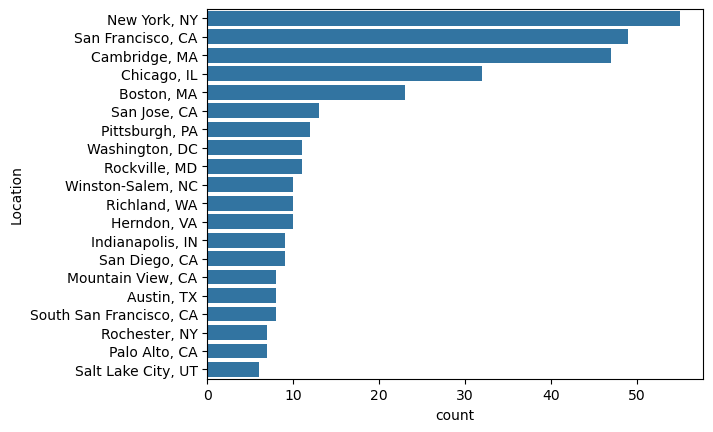

Graph for Headquarters: Total = 20


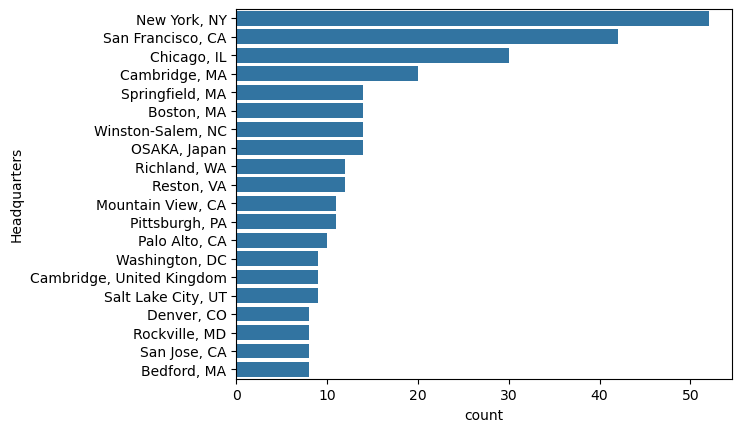

Graph for Company: Total = 20


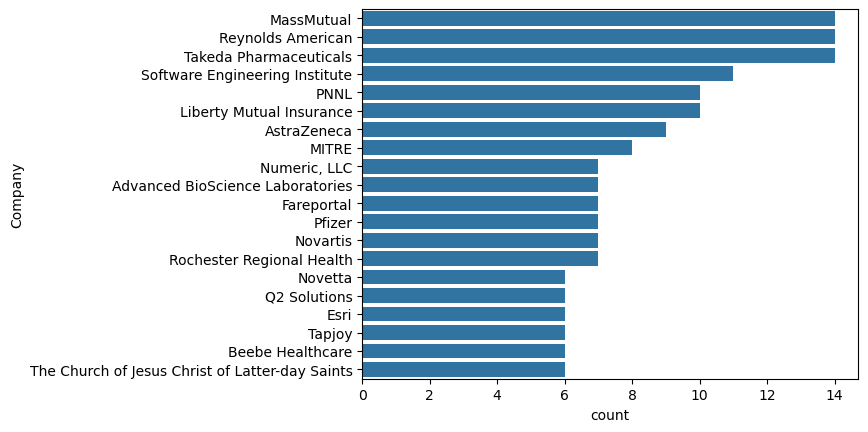

In [140]:
for i in df_cat[['Location', 'Headquarters', 'Company']].columns: 
    cat = df_cat[i].value_counts()[:20]
    print("Graph for %s: Total = %d" % (i, len(cat)))
    chart = sns.barplot(x= cat, y = cat.index)
    plt.show()

In [141]:
## Average Salary by simplified Job titles 
pd.pivot_table(df, index = 'Job Simplified', values = 'Average Salary')

,Average Salary
Job Simplified,
Analyst,65.857843
Data Engineer,105.403361
Data Scientist,117.564516
Director,168.607143
Machine Learning Engineer,126.431818
Manager,84.022727
NA,84.853261


In [142]:
## Average Salary by simplified job titles and seniority
pd.pivot_table(df, index = ['Job Simplified', 'Seniority'], values = 'Average Salary')

Average Salary
Job Simplified            Seniority                
Analyst                   Junior          53.250000
                          NA              61.308219
                          Senior          79.092593
Data Engineer             NA              96.701220
                          Senior         124.689189
Data Scientist            Junior         106.500000
                          NA             107.043011
                          Senior         138.956522
Director                  NA             168.607143
Machine Learning Engineer NA             119.133333
                          Senior         142.071429
Manager                   NA              84.022727
NA                        NA              73.988189
                          Senior         109.061404

In [146]:
## Average Salary by job locations ordered by highest average salary 
pd.pivot_table(df, index = 'State', values = 'Average Salary').sort_values('Average Salary', ascending = False)

,Average Salary
State,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [149]:
## Complete DataFrame 
pd.set_option('display.max_rows', None)

In [150]:
## Average Salary by job locations, job title simplified ordered by highest average salary 
pd.pivot_table(df, index = ['State', 'Job Simplified'], values ='Average Salary').sort_values('State', ascending = False)

Average Salary
State Job Simplified                           
WI    NA                              54.000000
      Data Scientist                 113.500000
      Analyst                         58.833333
WA    NA                              97.500000
      Data Scientist                  99.764706
      Analyst                         54.500000
VA    NA                              79.300000
      Machine Learning Engineer       87.000000
      Data Scientist                 108.416667
      Data Engineer                   96.900000
      Analyst                         71.583333
UT    Data Engineer                  100.333333
      Analyst                         54.750000
      Data Scientist                 140.500000
TX    NA                              41.285714
      Data Scientist                 100.730769
      Data Engineer                  113.062500
TN    Data Scientist                  96.000000
      Data Engineer                  100.950000
      Analyst                         13.500000
SC    NA                              60.500000
RI    Analyst                        100.000000
PA    Machine Learning Engineer      120.500000
      Data Engineer                   91.500000
      Data Scientist                 113.333333
      Analyst                         62.750000
      Manager                        109.666667
      NA                              76.062500
OR    Data Scientist                  98.500000
      Data Engineer                   73.000000
OH    NA                              91.166667
      Data Scientist                 105.285714
      Analyst                         53.875000
NY    NA                              81.583333
      Machine Learning Engineer      125.000000
      Data Scientist                 115.250000
      Data Engineer                   86.375000
      Analyst                         65.607143
NM    Data Scientist                  74.333333
NJ    Data Scientist                 106.875000
      Analyst                         83.583333
      Data Engineer                  112.000000
      Manager                        109.500000
      Director                       161.500000
      NA                              82.500000
NE    NA                              41.000000
NC    NA                              90.916667
      Data Scientist                 117.000000
      Data Engineer                  104.250000
MO    NA                              72.333333
      Manager                         40.500000
      Data Scientist                 127.666667
      Analyst                         61.000000
MN    Data Engineer                   95.000000
      Analyst                         76.000000
MI    Manager                         87.500000
      Data Scientist                 106.625000
MD    NA                              88.750000
      Data Scientist                 109.115385
      Data Engineer                  109.000000
      Analyst                         80.666667
MA    NA                             107.478261
      Manager                         71.900000
      Director                       117.833333
      Data Scientist                 113.750000
      Data Engineer                  107.291667
      Analyst                         59.125000
LA    Analyst                         48.000000
      Data Engineer                   70.500000
      NA                              20.000000
KY    NA                             103.500000
      Data Scientist                  84.000000
KS    Machine Learning Engineer       87.000000
IN    NA                              69.000000
      Data Scientist                  84.500000
      Data Engineer                  114.500000
IL    Analyst                         66.500000
      NA                              57.166667
      Machine Learning Engineer      133.000000
      Director                       221.750000
      Data Scientist                 117.233333
      Data Engineer                   96.125000
I

In [153]:
## Average Salary of Data Scientists by State 
pd.pivot_table(df[df['Job Simplified'] == 'Data Scientist'], index ='State', values ='Average Salary').sort_values('Average Salary', ascending = False)

,Average Salary
State,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [161]:
## Pivot Tables of Average Salary vs. other columns 
df_pivots = df[['Industry', 'Sector', 'Revenue', 'Competitor Count', 'Hourly', 'Employer Provided', 'Python', 'R Studio', 'Spark',
                'AWS', 'Excel', 'Type of ownership', 'Average Salary']]

In [165]:
for i in df_pivots.columns: 
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'Average Salary').sort_values('Average Salary', ascending = False))
    

Industry
                                          Average Salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & Distribution      146.000000
Financial Analytics & Research                145.125000
Health, Beauty, & Fitness                     139.500000
Telecommunications Services                   131.500000
Brokerage Services                            129.000000
Auctions & Galleries                          128.000000
Internet                                      123.810345
Investment Banking & Asset Management         118.400000
TV Broadcast & Cable Networks                 117.750000
Enterprise Software & Network Solutions       115.369048
Computer Hardware & Software                  115.194915
-1                                            114.650000
Accounting                                    113.500000
Biotech & Pharmaceuticals                     111.767857
Insurance Agencies & B

<class 'ValueError'>: Grouper for 'Average Salary' not 1-dimensional

In [173]:
## Pivot table of Average Salary based on Revenue and Python
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'Python', values = 'Average Salary', aggfunc = 'count').sort_values(by = [0,1], ascending = False)

Python,0,1
Revenue,,
Unknown / Non-Applicable,93.0,110.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$500 million to $1 billion (USD),29.0,28.0
$25 to $50 million (USD),24.0,16.0
$50 to $100 million (USD),21.0,25.0
$2 to $5 billion (USD),17.0,22.0
$1 to $2 billion (USD),16.0,44.0
$10 to $25 million (USD),16.0,16.0


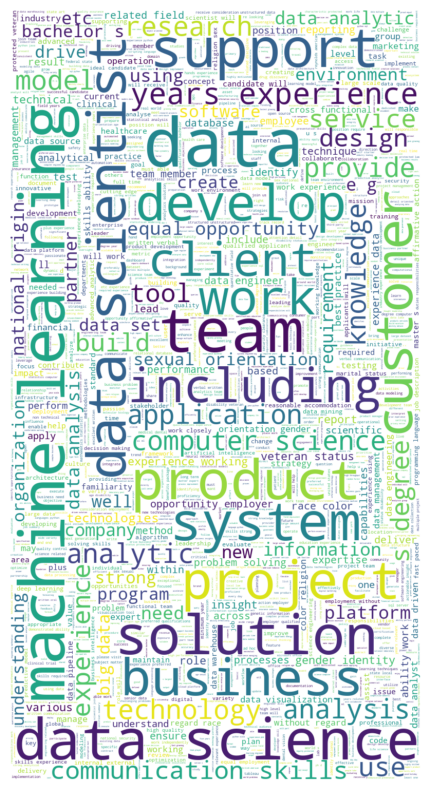

In [184]:
## Word Cloud from the Job Description 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

words = " ".join(df['Job Description'].dropna())

def clean_text(text):
    text = re.sub(r'[^a-zA-Z ]', ' ', text)
    tokens = text.lower().split()
    tokens = [w for w in tokens if w not in STOPWORDS]
    return " ".join(tokens)

text = clean_text(words)

wc = WordCloud(background_color="white", max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [188]:
## We download this df file to use it for model building 

df.to_csv("salary_data_eda.csv", index = False) 

